***

# Overfitting

***

overfit = high variance

underfit = high bias

collect more data, select most important features, reduce size of parameters by regularization

#### regularization

add sum of wj^2 to the cost function penalising w so that they do not overfir the model, makes function more smooth

### Cost function with regularization

$$ J = \frac{1}{2m} \sum_{i=0}^{m-1} loss(f_w(x^{(i)}),y^{(i)}) + {\color{blue}{\frac{\lambda}{2m} \sum_{j=0}^{n-1}w^{2}_j}}  $$

#### linear

$$ J = \frac{1}{2m} \sum_{i=0}^{m-1} (f_w(x^{(i)})-y^{(i)})^{2} + {\color{blue}{\frac{\lambda}{2m} \sum_{j=0}^{n-1}w^{2}_j}}  $$

#### logistic

$$ J = -\frac{1}{m} \sum_{i=0}^{m-1} [y^{(i)}\log(f_w(x^{(i)})) + (1-y^{(i)})\log(1-f_w(x^{(i)}))] + {\color{blue}{\frac{\lambda}{2m} \sum_{j=0}^{n-1}w^{2}_j}}  $$

#### L1 (Lasso)

$$ \sum_{j=0}^{n-1}|w_j| $$

#### L2 (Ridge)

$$ \sum_{j=0}^{n-1}w^{2}_j $$

`Lasso` regression tends to make some coefficeint `equal to 0`, while `Ridge` will decreasc them but `not make them 0`.

Blue color shows area where values of w parameters will be minimized. Values for w most adjusted to teh data will be outside area therefore the optimal spot will be on the verge.
For `L1` ti will very often be corner meaning one (or more) parameters equal to 0. For `L2` this is not the case

$$ S=|w_1|+|w_2| $$

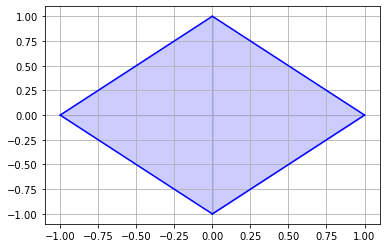

In [34]:
x=np.linspace(0,1)
y=x-1
plt.plot(x, y,color='b')
plt.fill_between(x,y,alpha=0.2,color='b')
y=-x+1
plt.plot(x, y,color='b')
plt.fill_between(x,y,alpha=0.2,color='b')
x=np.linspace(-1,0)
y=x+1
plt.plot(x, y,color='b')
plt.fill_between(x,y,alpha=0.2,color='b')
y=-x-1
plt.plot(x, y,color='b')
plt.fill_between(x,y,alpha=0.2,color='b')
plt.grid()

$$ S=w^{2}_1+w^{2}_2 $$

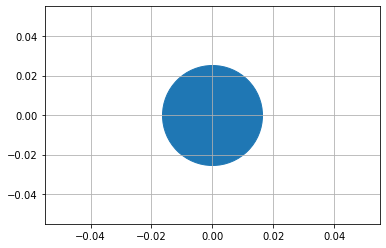

In [17]:
x=0
y=0
plt.scatter(x, y, s=10000)
plt.grid()

In [4]:
def cost_linear(x,y,w,w0,lambda_=1):
    rows,features=x.shape
    cost=0
    for row in range(rows):
        cost+=(np.dot(x[row],w)+w0-y[row])**2
    cost=cost/(2*rows)
    
    reg_cost=0
    for feature in range(features):
        reg_cost+=w[feature]**2
    reg_cost=reg_cost*lambda_/(2*rows)
    cost+=reg_cost
    return cost

In [5]:
def cost_logistic(x,y,w,w0,lambda_=1):
    cost=0
    rows,features=x.shape
    for row in range(rows):
        f=sigmoid(np.dot(x[row],w)+w0)
        cost+=-y[row]*np.log(f)-(1-y[row])*np.log(1-f)
    cost=cost/rows
    
    reg_cost=0
    for feature in range(features):
        reg_cost+=w[feature]**2
    reg_cost=reg_cost*lambda_/(2*rows)
    cost+=reg_cost
    return cost
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
np.random.seed(1)
x=np.random.rand(5,6)
y=np.array([0,1,0,1,0])
w=np.random.rand(x.shape[1]).reshape(-1)-0.5
w0=0.5
lambda_=0.7
cost_lin=cost_linear(x,y,w,w0,lambda_)
cost_log=cost_logistic(x,y,w,w0,lambda_)
print(f'Cost linear: {cost_lin}')
print(f'Cost logistic: {cost_log}')

Cost linear: 0.07917239320214275
Cost logistic: 0.6850849138741673


### gradient descent with regularization

$$ dw_j=\frac{1}{m} \sum_{i=0}^{m-1} (f_w(x^{(i)})-y^{(i)}) \cdot x^{(i)}_j + {\color{blue}{\frac{\lambda}{m}w_j}} $$

$$ dw_0=\frac{1}{m} \sum_{i=0}^{m-1} (f_w(x^{(i)})-y^{(i)}) $$


#### linear

$$ f_w(x^{(i)})=w \cdot x^{(i)}+b $$

#### logistic

$$ f_w(x^{(i)})=\dfrac {1}{1+e^{-(w_0+w_1x_1+w_2x_2+...+w_jx_j)}} $$

In [16]:
def gradient_linear(x,y,w,w0,lambda_):
    rows,features=x.shape
    dw=np.zeros(features)
    dw0=0
    for row in range(rows):
        f=np.dot(x[row],w)+w0
        dw0+=(f-y[row])
        for feature in range(features):
            dw[feature]+=(f-y[row])*x[row][feature]
    dw=dw/rows
    dw0=dw0/rows
    for feature in range(features):
        dw[feature]+=(lambda_/rows)*w[feature]
    return dw,dw0

In [17]:
def gradient_logistic(x,y,w,w0,lambda_):
    rows,features=x.shape
    dw=np.zeros(features)
    dw0=0
    for row in range(rows):
        f=sigmoid(np.dot(x[row],w)+w0)
        dw0+=f-y[row]
        for feature in range(features):
            dw[feature]+=(f-y[row])*x[row][feature]
    dw=dw/rows
    dw0=dw0/rows
    for feature in range(features):
        dw[feature]+=(lambda_/rows)*w[feature]
    return dw,dw0

In [18]:
np.random.seed(1)
x=np.random.rand(5,3)
y=np.array([0,1,0,1,0])
w=np.random.rand(x.shape[1])
w0=0.5
lambda_=0.7
dw_lin,dw0_lin=gradient_linear(x,y,w,w0,lambda_)
dw_log,dw0_log=gradient_logistic(x,y,w,w0,lambda_)
print(f'Gradient linear: dw: {dw_lin} dw0: {dw0_lin}')
print(f'Gradient logistic:: dw: {dw_log} dw0: {dw0_log}')

Gradient linear: dw: [0.29653215 0.49116796 0.21645878] dw0: 0.6648774569425726
Gradient logistic:: dw: [0.17380013 0.32007508 0.10776313] dw0: 0.341798994972791
